# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Neural Network class

* Generator
* Discriminator


In [2]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)
        self.activation = nn.Sigmoid()

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, z):

        # dummy assignment until this function is filled in
        h = F.relu(self.fc1(z.view(-1, 20)))
        probabilities = self.activation(self.fc2(h))
        return probabilities

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)
        self.activation = nn.Sigmoid()

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):

        # dummy assignment until this function is filled in
        h = F.relu(self.fc1(x.view(-1, 784)))
        probabilities = self.activation(self.fc2(h))
        return probabilities

# Loss Function

In [3]:
# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):

    # dummy assignment until this function is filled in
    BCE = F.binary_cross_entropy(predictions, targets, reduction='sum')
    return BCE

# Training

In [4]:
# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):

    # dummy assignment until this function is filled in
    train_generator_loss = 0
    train_discriminator_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        # Update D network
        # Train with all-real batch
        discriminator.zero_grad()
        predict_dis = discriminator(data).view(-1)
        label = torch.full((data.shape[0],), 1, dtype=torch.float, device=device)
        BCE_real = gan_loss_function(predict_dis, label)
        BCE_real.backward(retain_graph=True)
        # Train with all-false batch
        noise = torch.randn(data.shape[0], 20, 1, 1, device=device)
        fake_data = generator(noise)
        label.fill_(0)
        predict_dis_fake = discriminator(fake_data).view(-1)
        BCE_fake = gan_loss_function(predict_dis_fake, label)
        BCE_fake.backward(retain_graph=True)
        err_D = BCE_real + BCE_fake
        train_discriminator_loss += err_D.item()
        discriminator_optimizer.step()
        # Train with generator
        generator.zero_grad()
        label.fill_(1)
        predict_dis_real = discriminator(fake_data).view(-1)
        BCE_gen = gan_loss_function(predict_dis_real, label)
        train_generator_loss += BCE_gen.item()
        BCE_gen.backward(retain_graph=True)
        generator_optimizer.step()
    average_generator_loss = train_generator_loss / len(train_loader.dataset)
    average_discriminator_loss = train_discriminator_loss / len(train_loader.dataset)
    print('====> Epoch: {} Average generator loss: {:.4f} Average discriminator loss: {:.4f}'.format(
          epoch, average_generator_loss, average_discriminator_loss))
    return average_generator_loss, average_discriminator_loss


# Testing


In [11]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):

    # dummy assignment until this function is filled in
    test_generator_loss = 0
    test_discriminator_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        # Update D network
        predict_dis = discriminator(data).view(-1)
        label = torch.full((data.shape[0],), 1, dtype=torch.float, device=device)
        BCE_real = gan_loss_function(predict_dis, label)
        
        # follow the tutorial
        noise = torch.randn(data.shape[0], 20, 1, 1, device=device)
        fake_data = generator(noise)
        label.fill_(0)
        predict_dis_fake = discriminator(fake_data).view(-1)
        BCE_fake = gan_loss_function(predict_dis_fake, label)
        err_D = BCE_real + BCE_fake
        test_discriminator_loss += err_D.item()

        label.fill_(1)
        predict_dis_real = discriminator(fake_data).view(-1)
        BCE_gen = gan_loss_function(predict_dis_real, label)
        test_generator_loss += BCE_gen.item()
    average_generator_loss = test_generator_loss / len(train_loader.dataset)
    average_discriminator_loss = test_discriminator_loss / len(train_loader.dataset)
    print('====> Test set gen loss: {:.4f} Test set dis loss: {:.4f}'.format(average_generator_loss, average_discriminator_loss))
    return average_generator_loss, average_discriminator_loss

# Main

====> Epoch: 1 Average generator loss: 5.5406 Average discriminator loss: 0.1353
====> Test set gen loss: 6.0020 Test set dis loss: 0.0327
Sample of generated images


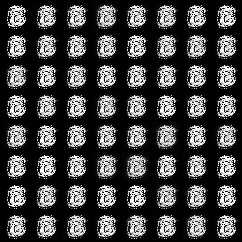



====> Epoch: 2 Average generator loss: 6.4896 Average discriminator loss: 0.0245
====> Test set gen loss: 5.9456 Test set dis loss: 0.0151
Sample of generated images


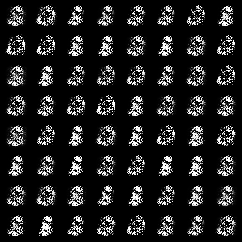



====> Epoch: 3 Average generator loss: 7.2246 Average discriminator loss: 0.0187
====> Test set gen loss: 5.9745 Test set dis loss: 0.0303
Sample of generated images


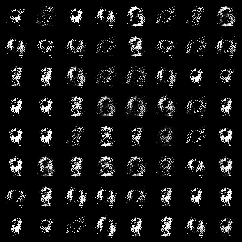



====> Epoch: 4 Average generator loss: 6.7100 Average discriminator loss: 0.0260
====> Test set gen loss: 5.7555 Test set dis loss: 0.0311
Sample of generated images


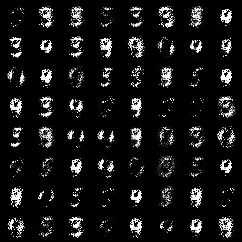



====> Epoch: 5 Average generator loss: 6.0676 Average discriminator loss: 0.0441
====> Test set gen loss: 4.9432 Test set dis loss: 0.0871
Sample of generated images


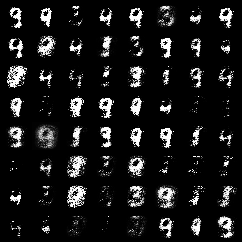



====> Epoch: 6 Average generator loss: 6.7181 Average discriminator loss: 0.0573
====> Test set gen loss: 5.8520 Test set dis loss: 0.0555
Sample of generated images


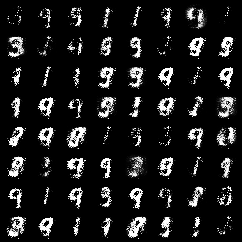



====> Epoch: 7 Average generator loss: 6.8980 Average discriminator loss: 0.0658
====> Test set gen loss: 6.4991 Test set dis loss: 0.0852
Sample of generated images


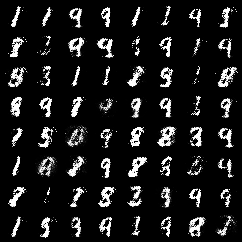



====> Epoch: 8 Average generator loss: 6.3619 Average discriminator loss: 0.0894
====> Test set gen loss: 4.7405 Test set dis loss: 0.1203
Sample of generated images


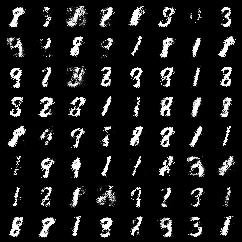



====> Epoch: 9 Average generator loss: 5.6820 Average discriminator loss: 0.1326
====> Test set gen loss: 5.3966 Test set dis loss: 0.1370
Sample of generated images


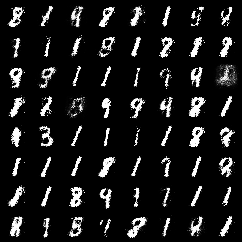



====> Epoch: 10 Average generator loss: 5.2575 Average discriminator loss: 0.1622
====> Test set gen loss: 5.9482 Test set dis loss: 0.1893
Sample of generated images


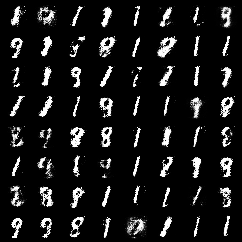



====> Epoch: 11 Average generator loss: 5.1396 Average discriminator loss: 0.1904
====> Test set gen loss: 4.2523 Test set dis loss: 0.2195
Sample of generated images


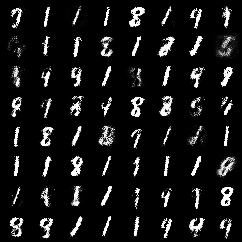



====> Epoch: 12 Average generator loss: 4.8054 Average discriminator loss: 0.2159
====> Test set gen loss: 4.4726 Test set dis loss: 0.2112
Sample of generated images


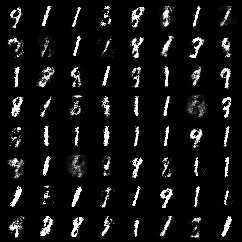



====> Epoch: 13 Average generator loss: 4.8801 Average discriminator loss: 0.2573
====> Test set gen loss: 4.9456 Test set dis loss: 0.3058
Sample of generated images


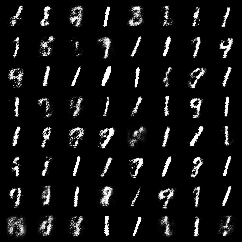



====> Epoch: 14 Average generator loss: 4.3720 Average discriminator loss: 0.2912
====> Test set gen loss: 2.6304 Test set dis loss: 0.3848
Sample of generated images


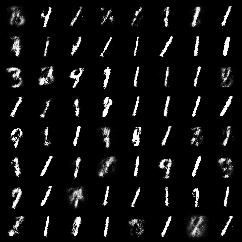



====> Epoch: 15 Average generator loss: 4.1332 Average discriminator loss: 0.3370
====> Test set gen loss: 4.1393 Test set dis loss: 0.3399
Sample of generated images


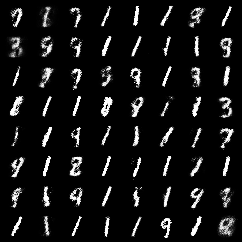



====> Epoch: 16 Average generator loss: 3.9838 Average discriminator loss: 0.3407
====> Test set gen loss: 3.4740 Test set dis loss: 0.3507
Sample of generated images


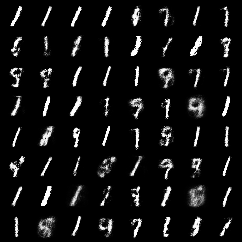



====> Epoch: 17 Average generator loss: 3.7336 Average discriminator loss: 0.3684
====> Test set gen loss: 3.8953 Test set dis loss: 0.5047
Sample of generated images


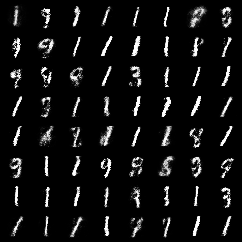



====> Epoch: 18 Average generator loss: 3.6230 Average discriminator loss: 0.4038
====> Test set gen loss: 2.4416 Test set dis loss: 0.5279
Sample of generated images


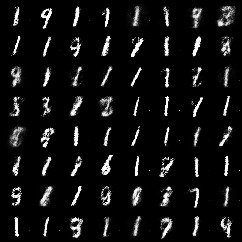



====> Epoch: 19 Average generator loss: 3.5720 Average discriminator loss: 0.4284
====> Test set gen loss: 3.1163 Test set dis loss: 0.4079
Sample of generated images


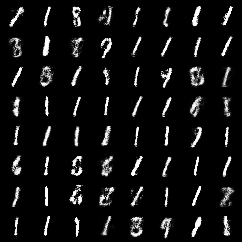



====> Epoch: 20 Average generator loss: 3.5500 Average discriminator loss: 0.4354
====> Test set gen loss: 2.9372 Test set dis loss: 0.4837
Sample of generated images


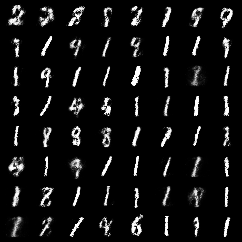



====> Epoch: 21 Average generator loss: 3.4347 Average discriminator loss: 0.4496
====> Test set gen loss: 3.2317 Test set dis loss: 0.4817
Sample of generated images


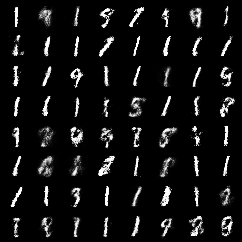



====> Epoch: 22 Average generator loss: 3.5432 Average discriminator loss: 0.4550
====> Test set gen loss: 3.2337 Test set dis loss: 0.3894
Sample of generated images


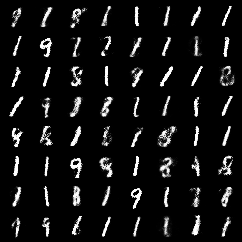



====> Epoch: 23 Average generator loss: 3.3362 Average discriminator loss: 0.4706
====> Test set gen loss: 3.3156 Test set dis loss: 0.5398
Sample of generated images


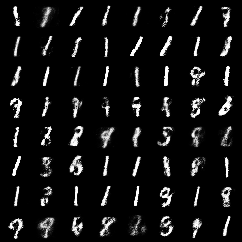



====> Epoch: 24 Average generator loss: 3.2341 Average discriminator loss: 0.4814
====> Test set gen loss: 4.0874 Test set dis loss: 0.5610
Sample of generated images


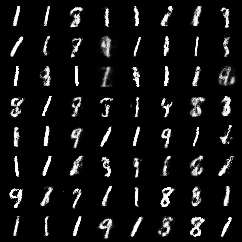



====> Epoch: 25 Average generator loss: 3.1038 Average discriminator loss: 0.4882
====> Test set gen loss: 2.8849 Test set dis loss: 0.5074
Sample of generated images


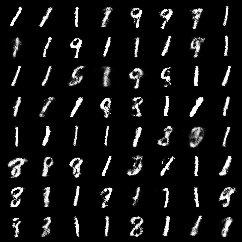



====> Epoch: 26 Average generator loss: 3.1197 Average discriminator loss: 0.4960
====> Test set gen loss: 2.9290 Test set dis loss: 0.4595
Sample of generated images


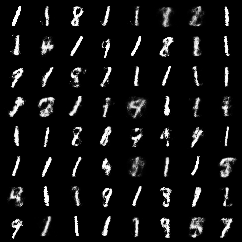



====> Epoch: 27 Average generator loss: 3.0408 Average discriminator loss: 0.4990
====> Test set gen loss: 3.4997 Test set dis loss: 0.5497
Sample of generated images


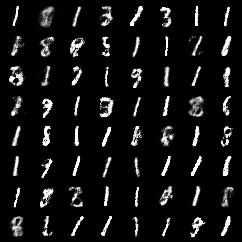



====> Epoch: 28 Average generator loss: 3.0532 Average discriminator loss: 0.5025
====> Test set gen loss: 3.2338 Test set dis loss: 0.4681
Sample of generated images


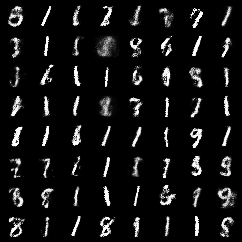



====> Epoch: 29 Average generator loss: 3.0231 Average discriminator loss: 0.5044
====> Test set gen loss: 2.7144 Test set dis loss: 0.4344
Sample of generated images


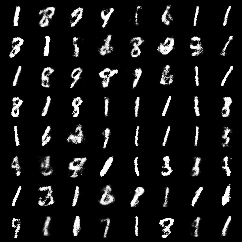



====> Epoch: 30 Average generator loss: 2.9344 Average discriminator loss: 0.5076
====> Test set gen loss: 2.9491 Test set dis loss: 0.4384
Sample of generated images


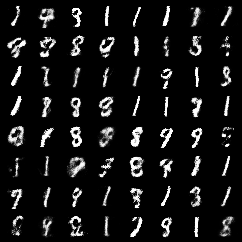



====> Epoch: 31 Average generator loss: 2.8681 Average discriminator loss: 0.5132
====> Test set gen loss: 2.8331 Test set dis loss: 0.5424
Sample of generated images


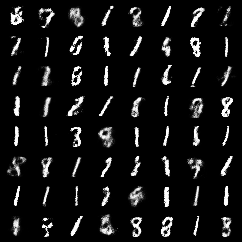



====> Epoch: 32 Average generator loss: 2.7978 Average discriminator loss: 0.5128
====> Test set gen loss: 2.7804 Test set dis loss: 0.4586
Sample of generated images


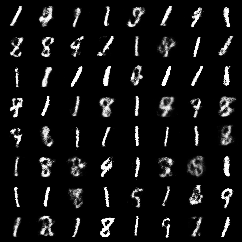



====> Epoch: 33 Average generator loss: 2.8460 Average discriminator loss: 0.5103
====> Test set gen loss: 2.6792 Test set dis loss: 0.5321
Sample of generated images


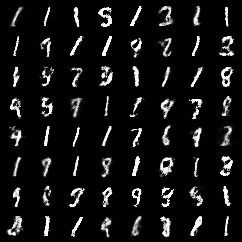



====> Epoch: 34 Average generator loss: 2.8233 Average discriminator loss: 0.5241
====> Test set gen loss: 3.0920 Test set dis loss: 0.4077
Sample of generated images


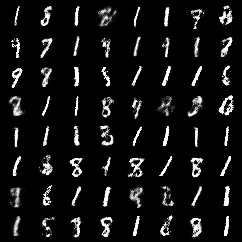



====> Epoch: 35 Average generator loss: 2.8178 Average discriminator loss: 0.5190
====> Test set gen loss: 2.5482 Test set dis loss: 0.6066
Sample of generated images


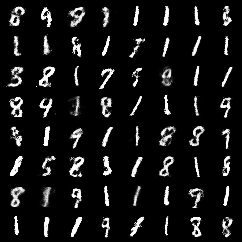



====> Epoch: 36 Average generator loss: 2.8230 Average discriminator loss: 0.5327
====> Test set gen loss: 2.7061 Test set dis loss: 0.4873
Sample of generated images


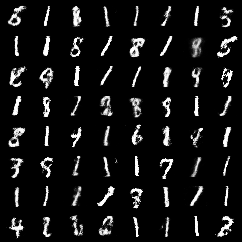



====> Epoch: 37 Average generator loss: 2.8131 Average discriminator loss: 0.5241
====> Test set gen loss: 3.0987 Test set dis loss: 0.4999
Sample of generated images


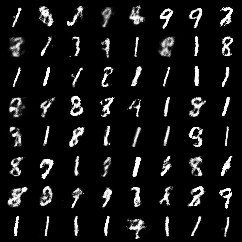



====> Epoch: 38 Average generator loss: 2.7428 Average discriminator loss: 0.5198
====> Test set gen loss: 2.6286 Test set dis loss: 0.4591
Sample of generated images


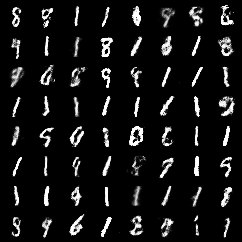



====> Epoch: 39 Average generator loss: 2.6766 Average discriminator loss: 0.5187
====> Test set gen loss: 2.3535 Test set dis loss: 0.4940
Sample of generated images


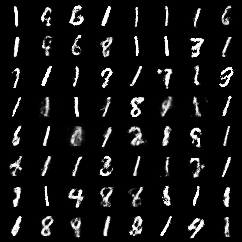



====> Epoch: 40 Average generator loss: 2.7302 Average discriminator loss: 0.5222
====> Test set gen loss: 2.5578 Test set dis loss: 0.5394
Sample of generated images


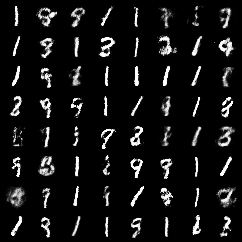



====> Epoch: 41 Average generator loss: 2.7205 Average discriminator loss: 0.5234
====> Test set gen loss: 2.6793 Test set dis loss: 0.4843
Sample of generated images


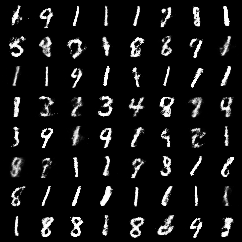



====> Epoch: 42 Average generator loss: 2.7404 Average discriminator loss: 0.5230
====> Test set gen loss: 2.5833 Test set dis loss: 0.5094
Sample of generated images


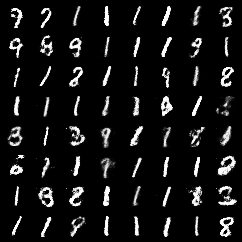



====> Epoch: 43 Average generator loss: 2.7134 Average discriminator loss: 0.5263
====> Test set gen loss: 2.7282 Test set dis loss: 0.5326
Sample of generated images


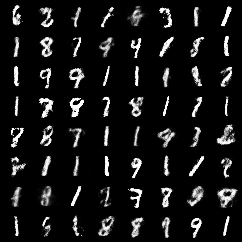



====> Epoch: 44 Average generator loss: 2.7415 Average discriminator loss: 0.5194
====> Test set gen loss: 2.6606 Test set dis loss: 0.4800
Sample of generated images


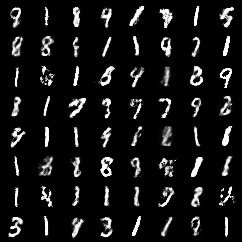



====> Epoch: 45 Average generator loss: 2.6600 Average discriminator loss: 0.5204
====> Test set gen loss: 2.5299 Test set dis loss: 0.5146
Sample of generated images


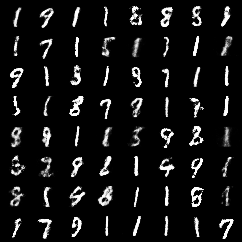



====> Epoch: 46 Average generator loss: 2.6834 Average discriminator loss: 0.5215
====> Test set gen loss: 2.9425 Test set dis loss: 0.4587
Sample of generated images


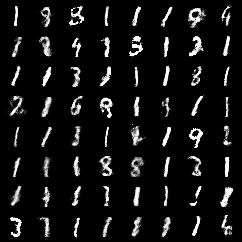



====> Epoch: 47 Average generator loss: 2.6882 Average discriminator loss: 0.5173
====> Test set gen loss: 2.3829 Test set dis loss: 0.5235
Sample of generated images


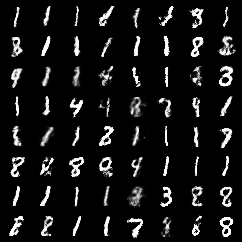



====> Epoch: 48 Average generator loss: 2.6451 Average discriminator loss: 0.5169
====> Test set gen loss: 2.5749 Test set dis loss: 0.4978
Sample of generated images


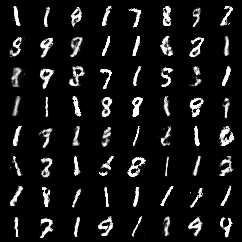



====> Epoch: 49 Average generator loss: 2.6854 Average discriminator loss: 0.5103
====> Test set gen loss: 2.2616 Test set dis loss: 0.5467
Sample of generated images


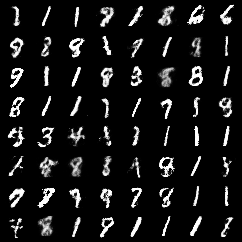



====> Epoch: 50 Average generator loss: 2.6919 Average discriminator loss: 0.5128
====> Test set gen loss: 2.5179 Test set dis loss: 0.5143
Sample of generated images


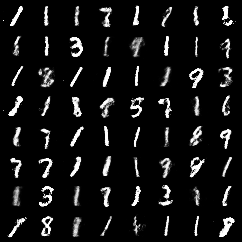

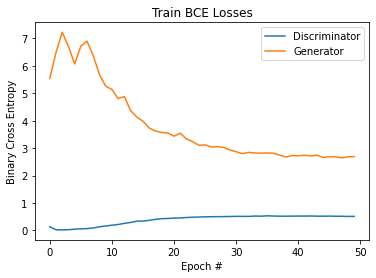

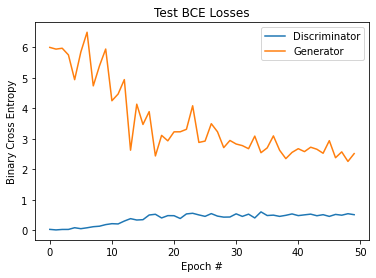

In [12]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()


These graph follows the given tutorial(DCGAN), the BCE loss of generator was really high at the beginning because at first we tried to minimized the BCE of discriminator. And the generator generates images that is easy to be distinguished. In this way, the test/train loss of discriminator increases by the rise of epoch number. As a result, the train/test BCE loss of generator decreases with the increase of number of epoches. In the graph it only shows 50 epoches, it is predictable that discriminator will make more tradeoff to make both of them reach the overall lowest BCE losses together.